In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For default view 
pd.set_option("display.max_columns", 75)

In [2]:
#Loading the data set
df = pd.read_csv('electricity_bill_dataset.csv')
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8           3806.4  
2         7.7           3203.2  
3         9.2           4370.0  
4         9.2           4204.4

In [3]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [5]:
# Data preparation
## Data Cleaning
# Checking missing values
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [6]:
# Checking duplicates
df.duplicated().sum()

0

In [7]:
# Converting electricitybill data type to float for uniformity
df['ElectricityBill'] = df['ElectricityBill'].astype(float)
df['ElectricityBill']

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [8]:
# Feature Engineering
# Method to categorize seasons
def categorize_seasons(Month):
    if Month in [3, 4, 5]:
        return "Summer"
    elif Month in [6, 7, 8, 9]:
        return  "Monsoon"
    else:
        return  "Winter"

    
df['season'] = df['Month'].apply(categorize_seasons)

df.head()


Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  
0         8.4           3225.6   Winter  
1         7.8           3806.4   Summer  
2         7.7           3203.2  Monsoon  
3         9.2           4370.0  Monsoon  
4         9.2           4204.4   Winter

In [9]:
# MonthlyCostPerHour
df['MonthlyCostPerHour'] = df['ElectricityBill'] / df['MonthlyHours']
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  
0         8.4           3225.6   Winter                 8.4  
1         7.8           3806.4   Summer                 7.8  
2         7.7           3203.2  Monsoon                 7.7  
3         9.2           4370.0  Monsoon                 9.2  
4         9.2           4204.4   Winter                 9.2

In [10]:
# Tariff Efficiency
df['TariffEfficiency'] = df['ElectricityBill'] / df['TariffRate']
df.head()


Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  
0         8.4           3225.6   Winter                 8.4             384.0  
1         7.8           3806.4   Summer                 7.8             488.0  
2         7.7           3203.2  Monsoon                 7.7             416.0  
3         9.2           4370.0  Monsoon                 9.2             475.0  
4         9.2           4204.4   Winter                 9.2             457.0

In [11]:
# Total Appliance Usage
df['TotalApplianceHours'] = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']].sum(axis=1)
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  \
0         8.4           3225.6   Winter                 8.4             384.0   
1         7.8           3806.4   Summer                 7.8             488.0   
2         7.7           3203.2  Monsoon                 7.7             416.0   
3         9.2           4370.0  Monsoon                 9.2             475.0   
4         9.2           4204.4   Winter                 9.2             457.0   

   TotalApplianceHours  
0                 48.0  
1                 47.0  
2                 42.0  
3                 54.0  
4                 48.0

In [12]:
# Percentage Contribution of Each Appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
for appliance in appliances:
    df[f'{appliance}_Contribution'] = (df[appliance] / df['TotalApplianceHours']) * 100
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  \
0         8.4           3225.6   Winter                 8.4             384.0   
1         7.8           3806.4   Summer                 7.8             488.0   
2         7.7           3203.2  Monsoon                 7.7             416.0   
3         9.2           4370.0  Monsoon                 9.2             475.0   
4         9.2           4204.4   Winter                 9.2             457.0   

   TotalApplianceHours  Fan_Contribution  Refrigerator_Contribution  \
0                 48.0         33.333333                  47.916667   
1                 47.0         40.425532                  46.808511   
2                 42.0         16.666667                  47.619048   
3                 54.0         12.962963                  40.740741   
4                 48.0         22.916667                  47.916667   

   AirConditioner_Contribution  Television_Contribution  Monitor_Contribution  \
0                     4.166667                12.500000              2.083333   
1                     4.255319                 6.382979              2.127660   
2                     4.761905                14.285714             16.666667   
3                     5.555556                38.888889              1.851852   
4                     4.166667                22.916667              2.083333   

   MotorPump_Contribution  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [13]:
# Usage Category
def categorize_usage(bill):
    if bill < 2500:
        return 'Low'
    elif  2501 <= bill <= 5000 :
        return 'Medium'
    else:
        return 'High'

df['UsageCategory'] = df['ElectricityBill'].apply(categorize_usage)
df.head(15)

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0    16          23.0             2.0         6.0      1.0          0     10   
1    19          22.0             2.0         3.0      1.0          0      5   
2     7          20.0             2.0         6.0      7.0          0      7   
3     7          22.0             3.0        21.0      1.0          0      6   
4    11          23.0             2.0        11.0      1.0          0      2   
5    13          22.0             0.0        18.0      1.0          0      6   
6    23          22.0             3.0        20.0     12.0          0      5   
7    22          23.0             0.0        21.0      1.0          0     12   
8     8          20.0             2.0         8.0      1.0          0      8   
9    10          23.0             0.0        18.0      7.0          0      1   
10   16          22.0             3.0        14.0      1.0          0      6   
11    5          19.0             2.0        20.0      1.0          0     12   
12   10          23.0             1.0        22.0      1.0          0      9   
13   11          22.0             3.0        19.0      1.0          0     11   
14   18          22.0             1.0         3.0     12.0          0      7   

         City                                    Company  MonthlyHours  \
0   Hyderabad                    Tata Power Company Ltd.           384   
1    Vadodara                                       NHPC           488   
2      Shimla                            Jyoti Structure           416   
3      Mumbai                            Power Grid Corp           475   
4      Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   
5   Ratnagiri                           Adani Power Ltd.           471   
6   New Delhi                            Kalpataru Power           755   
7   New Delhi                           Adani Power Ltd.           492   
8   New Delhi                               Orient Green           546   
9       Dahej            Sterlite Power Transmission Ltd           578   
10  Ahmedabad         Neueon Towers / Sujana Towers Ltd.           450   
11     Mumbai            Sterlite Power Transmission Ltd           493   
12  Hyderabad                          KEC International           492   
13  Ahmedabad                            Indowind Energy           565   
14      Noida            Unitech Power Transmission Ltd.           414   

    TariffRate  ElectricityBill   season  MonthlyCostPerHour  \
0          8.4           3225.6   Winter                 8.4   
1          7.8           3806.4   Summer                 7.8   
2          7.7           3203.2  Monsoon                 7.7   
3          9.2           4370.0  Monsoon                 9.2   
4          9.2           4204.4   Winter                 9.2   
5          7.4           3485.4  Monsoon                 7.4   
6          8.5           6417.5   Summer                 8.5   
7          8.5           4182.0   Winter                 8.5   
8          8.5           4641.0  Monsoon                 8.5   
9          7.6           4392.8   Winter                 7.6   
10         7.9           3555.0  Monsoon                 7.9   
11         9.2           4535.6   Winter                 9.2   
12         8.4           4132.8  Monsoon                 8.4   
13         7.9           4463.5   Winter                 7.9   
14         8.2           3394.8  Monsoon                 8.2   

    TariffEfficiency  TotalApplianceHours  Fan_Contribution  \
0              384.0                 48.0         33.333333   
1              488.0                 47.0         40.425532   
2              416.0                 42.0         16.666667   
3              475.0                 54.0         12.962963   
4              457.0                 48.0         22.916667   
5              471.0                 54.0         24.074074   
6              755.0                 80.0         28.750000   
7        

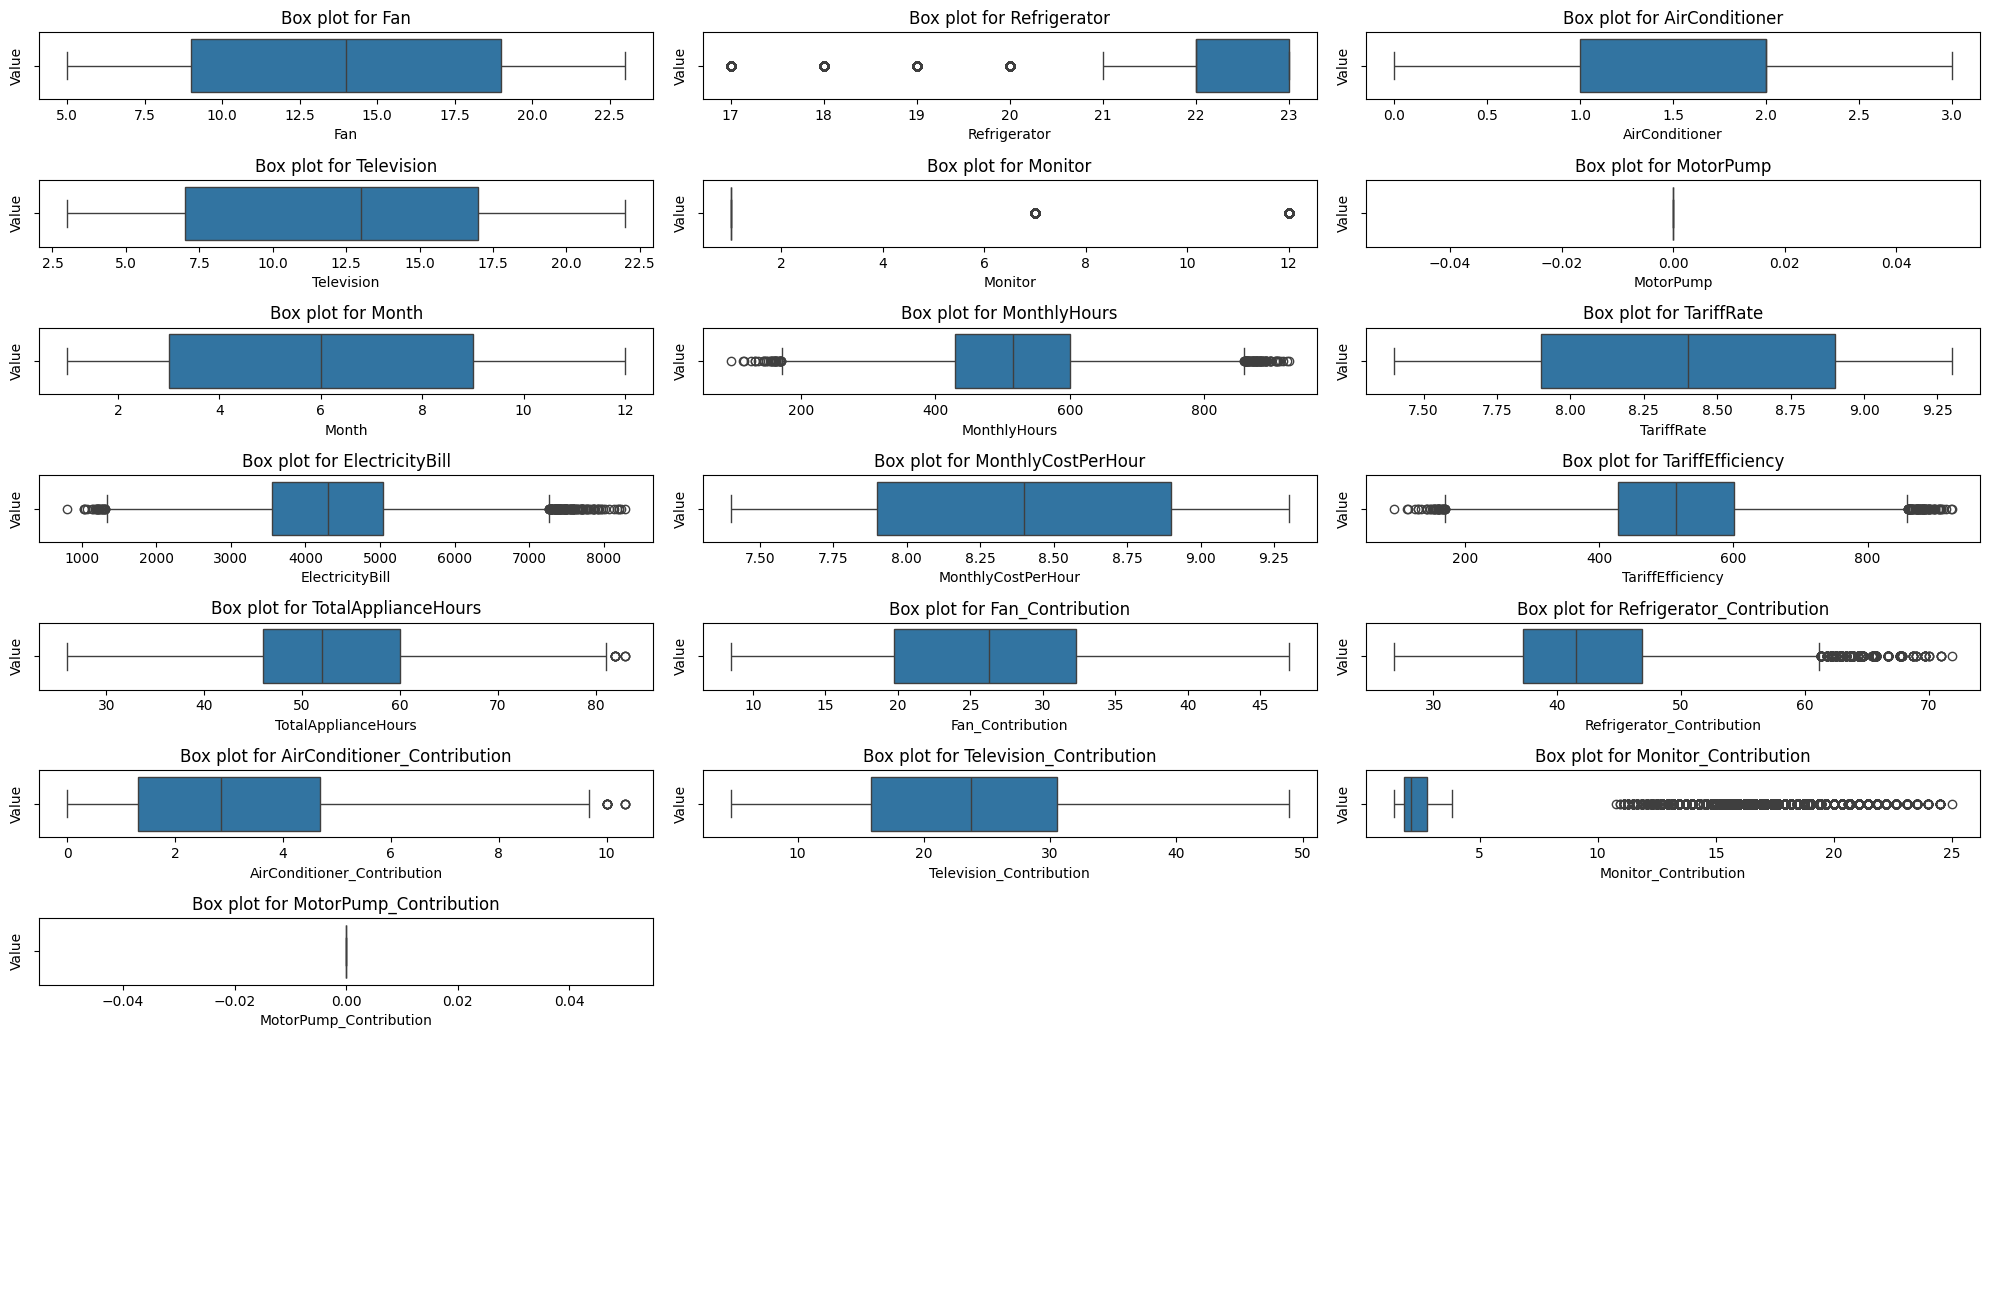

In [14]:
# Checking for outliers
#Only select numeric columns 
numeric_columns = df.select_dtypes(include=['float','integer']).columns[:]

# Grid layout
rows, cols = 9, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


In [15]:
# Dropping outliers
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['float','integer'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.20)  # .20
q3 = numeric_data.quantile(0.80)  # .80
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 45345
Number of rows after removing outliers: 34654
Number of rows removed: 10691



Average Consumption per Appliance (kWh):
        Appliance  Average Consumption (kWh)
1    Refrigerator                  21.928205
0             Fan                  14.305188
3      Television                  12.525105
2  AirConditioner                   1.513909
4         Monitor                   1.000000
5       MotorPump                   0.000000


/tmp/ipykernel_7173/860222075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=appliance_consumption, x='Average Consumption (kWh)', y='Appliance', palette='coolwarm')


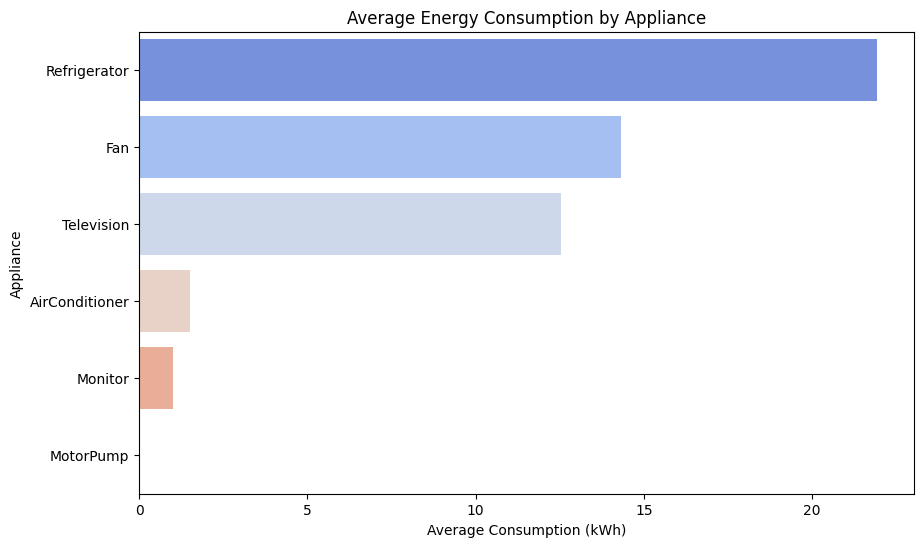

In [16]:

# --------- Objective 1: Appliance-Specific Energy Consumption ---------

# Calculate total consumption for each appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
appliance_consumption = df[appliances].mean().reset_index()
appliance_consumption.columns = ['Appliance', 'Average Consumption (kWh)']

# Sort appliances by average consumption
appliance_consumption = appliance_consumption.sort_values('Average Consumption (kWh)', ascending=False)
print("\nAverage Consumption per Appliance (kWh):")
print(appliance_consumption)

# Plot appliance-specific consumption
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_consumption, x='Average Consumption (kWh)', y='Appliance', palette='coolwarm')
plt.title('Average Energy Consumption by Appliance')
plt.xlabel('Average Consumption (kWh)')
plt.ylabel('Appliance')
plt.show()




Monthly Electricity Usage Trends:
    Month  ElectricityBill        Fan  Refrigerator  AirConditioner
0       1      4308.876709  14.338424     21.919125        1.502950
1       2      3831.561739  14.245913     21.922783        1.517913
2       3      4333.636459  14.344546     21.917431        1.529392
3       4      4177.856891  14.369806     21.964681        1.515928
4       5      4290.081589  14.377794     21.914154        1.473217
5       6      4135.277266  14.295330     21.954327        1.508929
6       7      4349.890323  14.440042     21.960028        1.505259
7       8      4310.891125  14.181911     21.937669        1.534553
8       9      4146.695658  14.102303     21.895066        1.524342
9      10      4320.486474  14.296188     21.903959        1.524560
10     11      4156.563990  14.275709     21.916297        1.517595
11     12      4325.006415  14.412055     21.933380        1.510398


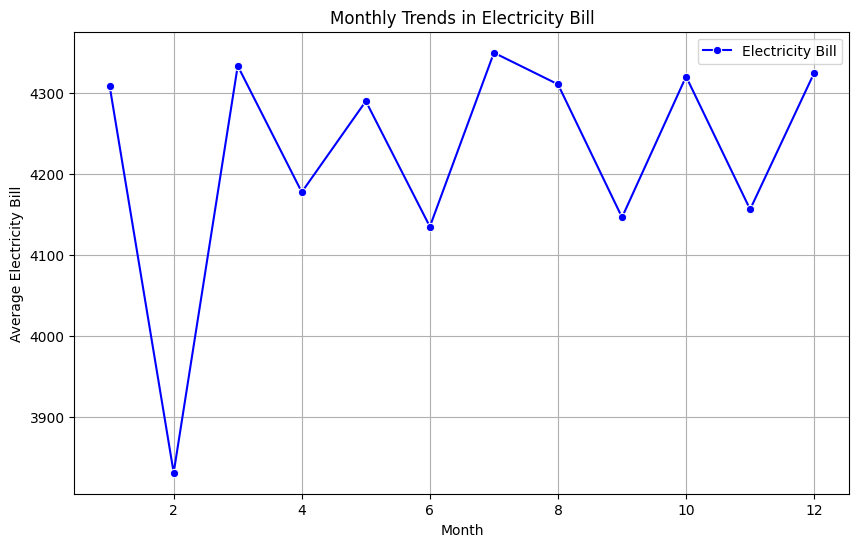

In [17]:
# --------- Objective 2: Monthly Electricity Usage Trends ---------

# Calculate average consumption and electricity bill by month
monthly_trends = df.groupby('Month')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
print("\nMonthly Electricity Usage Trends:")
print(monthly_trends)

# Plot total electricity bill over months
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trends, x='Month', y='ElectricityBill', marker='o', color='blue', label='Electricity Bill')
plt.title('Monthly Trends in Electricity Bill')
plt.xlabel('Month')
plt.ylabel('Average Electricity Bill')
plt.grid()
plt.legend()
plt.show()


City-Wise Electricity Usage and Billing:
           City  ElectricityBill        Fan  Refrigerator  AirConditioner
7        Mumbai      4680.156273  14.418358     21.933579        1.527214
9   Navi Mumbai      4673.726280  14.222372     21.880503        1.486523
12         Pune      4603.194137  14.501163     21.898092        1.494183
8        Nagpur      4510.086442  14.422160     21.972417        1.562412
1       Chennai      4454.878578  14.339102     21.949953        1.507951
6       Kolkata      4416.534247  14.269721     21.964100        1.502126
10    New Delhi      4296.993409  14.330455     21.913182        1.540909
5     Hyderabad      4213.700754  14.051441     21.938803        1.536142
4       Gurgaon      4203.189982  14.425657     21.957842        1.522665
11        Noida      4110.962628  14.328518     21.946878        1.486952
3     Faridabad      4082.198507  14.346902     21.924469        1.529625
0     Ahmedabad      3957.286049  14.292603     21.902154        1.468

/tmp/ipykernel_7173/1657182755.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_analysis, x='City', y='ElectricityBill', palette='viridis')


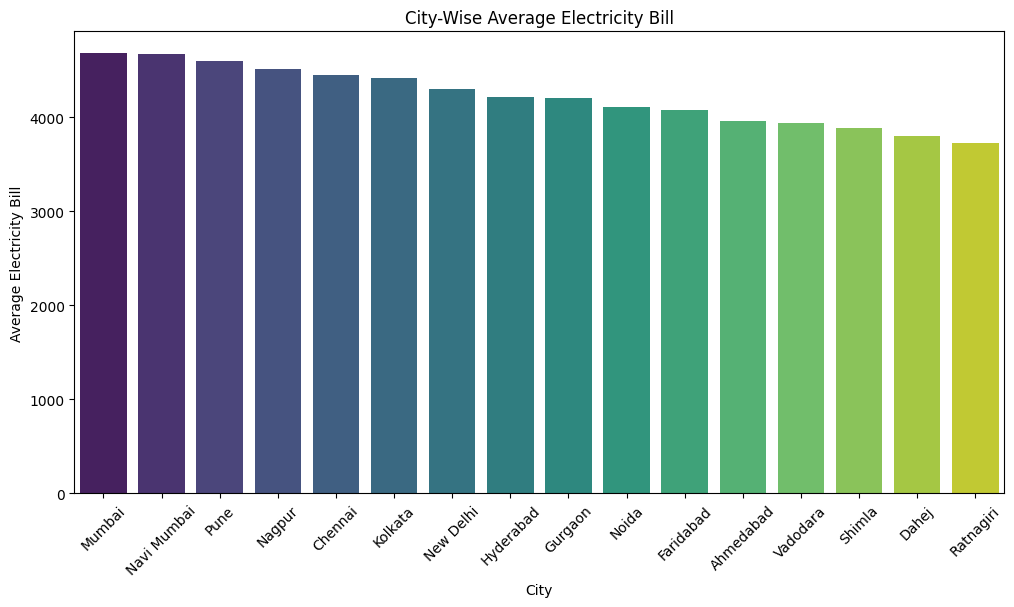

In [18]:
# --------- Objective 3: City-Wise Electricity Usage ---------

# Calculate average electricity consumption and bill by city
city_analysis = df.groupby('City')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
city_analysis = city_analysis.sort_values('ElectricityBill', ascending=False)
print("\nCity-Wise Electricity Usage and Billing:")
print(city_analysis)

# Plot city-wise electricity bills
plt.figure(figsize=(12, 6))
sns.barplot(data=city_analysis, x='City', y='ElectricityBill', palette='viridis')
plt.title('City-Wise Average Electricity Bill')
plt.xlabel('City')
plt.ylabel('Average Electricity Bill')
plt.xticks(rotation=45)
plt.show()


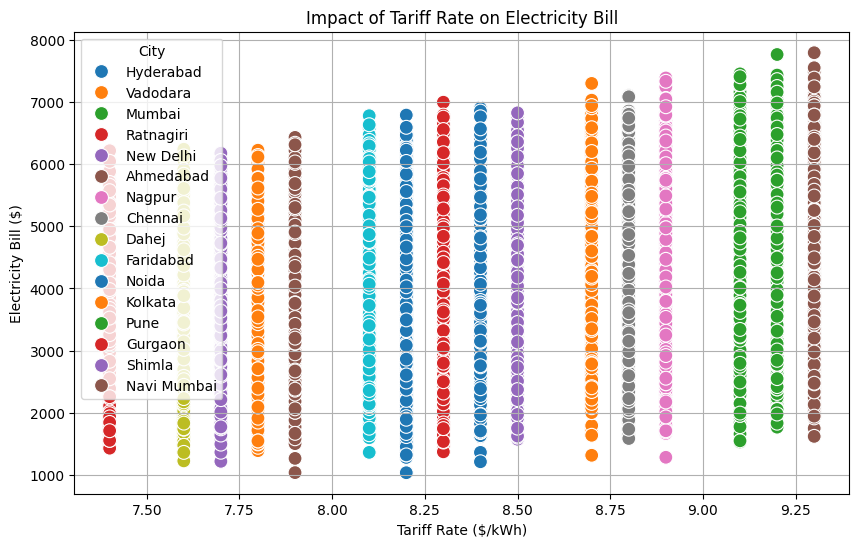


Correlation between Tariff Rate and Electricity Bill: 0.30


In [19]:
# --------- Objective 4: Impact of Tariff Rates ---------

# Analyze the relationship between TariffRate and ElectricityBill
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TariffRate', y='ElectricityBill', hue='City', palette='tab10', s=100)
plt.title('Impact of Tariff Rate on Electricity Bill')
plt.xlabel('Tariff Rate ($/kWh)')
plt.ylabel('Electricity Bill ($)')
plt.grid()
plt.show()

# Correlation between TariffRate and ElectricityBill
correlation = df[['TariffRate', 'ElectricityBill']].corr().iloc[0, 1]
print(f"\nCorrelation between Tariff Rate and Electricity Bill: {correlation:.2f}")


In [20]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill', 'season', 'MonthlyCostPerHour', 'TariffEfficiency',
       'TotalApplianceHours', 'Fan_Contribution', 'Refrigerator_Contribution',
       'AirConditioner_Contribution', 'Television_Contribution',
       'Monitor_Contribution', 'MotorPump_Contribution', 'UsageCategory'],
      dtype='object')


Proportion of Total Electricity Consumption by Appliance:
        Appliance  Total Consumption (kWh)  Proportion (%)
1    Refrigerator                 759900.0       42.768042
0             Fan                 495732.0       27.900364
3      Television                 434045.0       24.428549
2  AirConditioner                  52463.0        2.952678
4         Monitor                  34654.0        1.950367
5       MotorPump                      0.0        0.000000


/tmp/ipykernel_7173/3553329814.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=appliance_efficiency, x='Proportion (%)', y='Appliance', palette='crest')


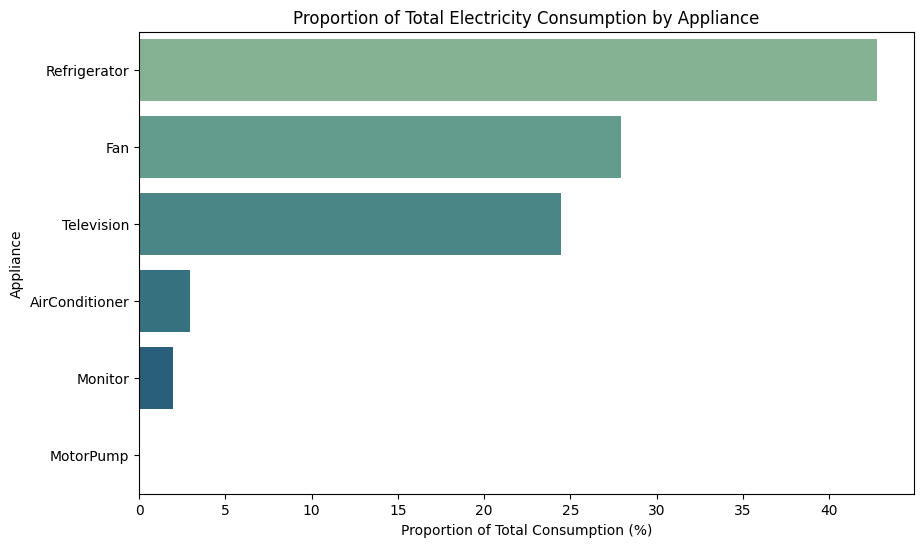

In [21]:
# --------- Objective 5: Total Energy Efficiency ---------

# Calculate the proportion of total electricity consumption by each appliance
df['TotalConsumption'] = df[appliances].sum(axis=1)
appliance_efficiency = df[appliances].sum().reset_index()
appliance_efficiency.columns = ['Appliance', 'Total Consumption (kWh)']
appliance_efficiency['Proportion (%)'] = (appliance_efficiency['Total Consumption (kWh)'] / appliance_efficiency['Total Consumption (kWh)'].sum()) * 100

# Sort by proportion of consumption
appliance_efficiency = appliance_efficiency.sort_values('Proportion (%)', ascending=False)
print("\nProportion of Total Electricity Consumption by Appliance:")
print(appliance_efficiency)

# Plot energy efficiency by appliance
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_efficiency, x='Proportion (%)', y='Appliance', palette='crest')
plt.title('Proportion of Total Electricity Consumption by Appliance')
plt.xlabel('Proportion of Total Consumption (%)')
plt.ylabel('Appliance')
plt.show()

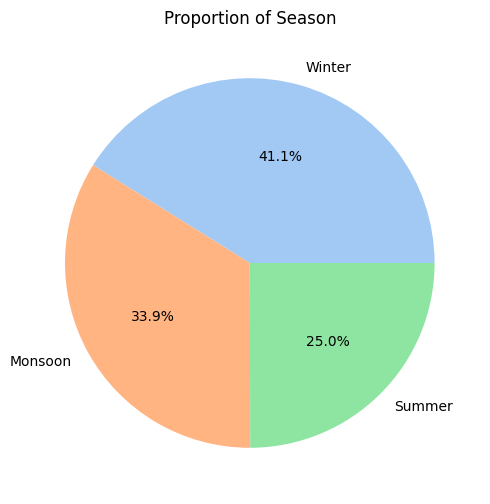

In [22]:
# seasonal pie chart distribution
    # Pie chart
plt.figure(figsize=(6, 6))
df['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Season')
plt.ylabel('')
plt.show()

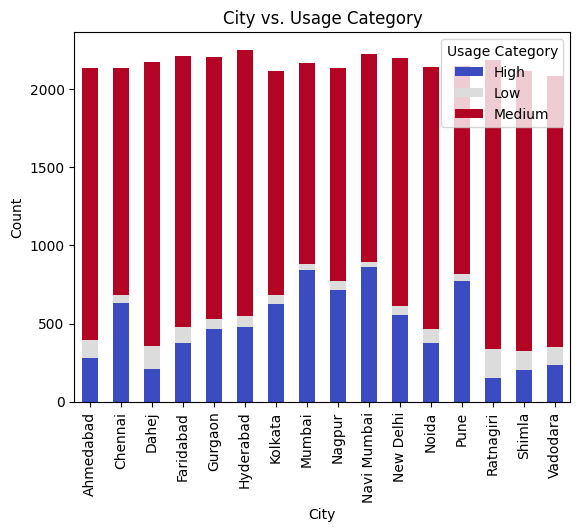

In [23]:
# Stacked bar chart example
pd.crosstab(df['City'], df['UsageCategory']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('City vs. Usage Category')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Usage Category')
plt.show()



Seasonal Analysis Results:
    season  ElectricityBill  TariffEfficiency  MonthlyCostPerHour  \
0  Monsoon      4234.392651        505.460020            8.374388   
1   Summer      4267.431538        509.838844            8.369908   
2   Winter      4186.707391        500.275477            8.367883   

   Fan_Contribution  Refrigerator_Contribution  AirConditioner_Contribution  \
0         27.312130                  43.885647                     3.006244   
1         27.429598                  43.742722                     2.986312   
2         27.375267                  43.776122                     2.990558   

   Television_Contribution  Monitor_Contribution  MotorPump_Contribution  
0                23.783189              2.012790                     0.0  
1                23.834849              2.006519                     0.0  
2                23.848986              2.009067                     0.0  


/tmp/ipykernel_7173/68868623.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_analysis, x='season', y='ElectricityBill', palette='coolwarm')


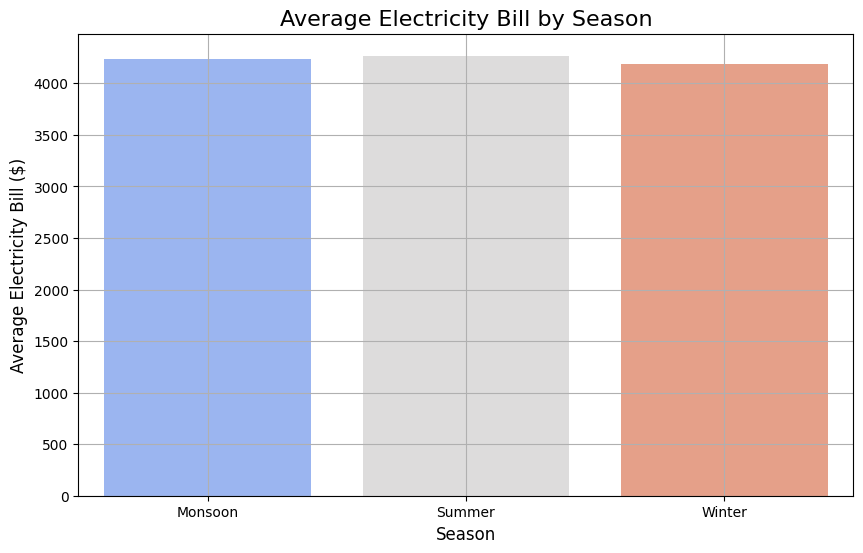

In [24]:
# --------- Step 1: Seasonal Analysis ---------

# Group by season and calculate average electricity bill, tariff efficiency, and appliance contributions
seasonal_analysis = df.groupby('season')[
    ['ElectricityBill', 'TariffEfficiency', 'MonthlyCostPerHour'] + 
    ['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
     'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution']
].mean().reset_index()

print("\nSeasonal Analysis Results:")
print(seasonal_analysis)

# Plot seasonal electricity bills
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_analysis, x='season', y='ElectricityBill', palette='coolwarm')
plt.title('Average Electricity Bill by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Electricity Bill ($)', fontsize=12)
plt.grid(True)
plt.show()



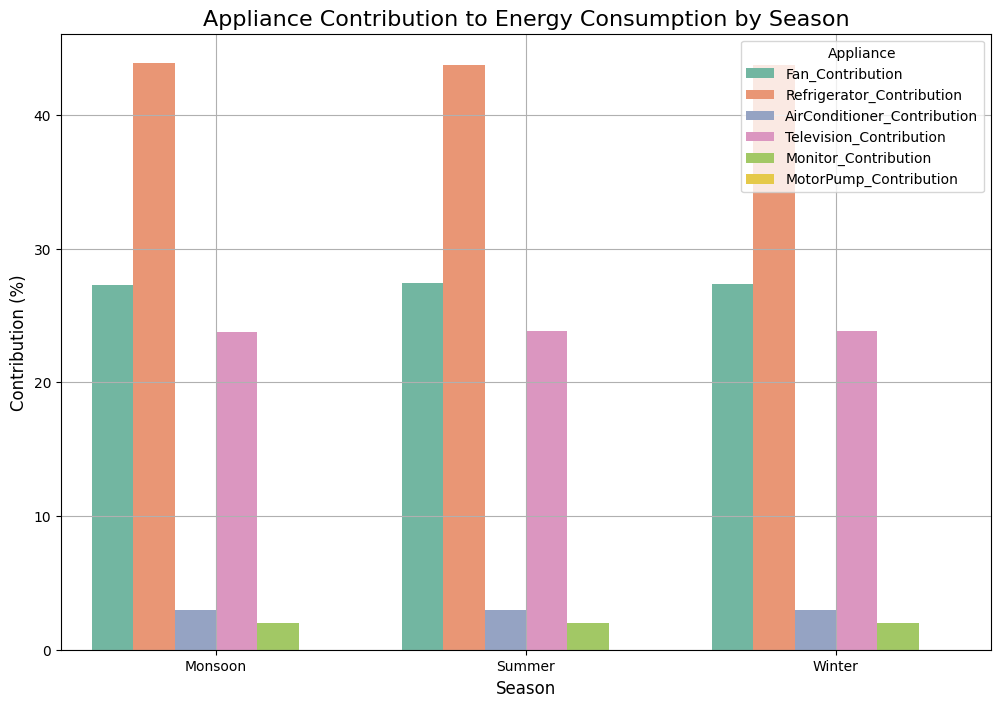

In [25]:
# Plot seasonal appliance contributions
appliance_contributions = seasonal_analysis.melt(
    id_vars='season', 
    value_vars=['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
                'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution'],
    var_name='Appliance',
    value_name='Contribution (%)'
)

plt.figure(figsize=(12, 8))
sns.barplot(data=appliance_contributions, x='season', y='Contribution (%)', hue='Appliance', palette='Set2')
plt.title('Appliance Contribution to Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.legend(title='Appliance', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()



Cost Efficiency by City and Season:
           City   season  MonthlyCostPerHour  TariffEfficiency
0     Ahmedabad  Monsoon                 7.9        501.458333
1     Ahmedabad   Summer                 7.9        508.566108
2     Ahmedabad   Winter                 7.9        495.813424
3       Chennai  Monsoon                 8.8        509.900133
4       Chennai   Summer                 8.8        510.621569
5       Chennai   Winter                 8.8        500.548461
6         Dahej  Monsoon                 7.6        500.298898
7         Dahej   Summer                 7.6        499.625461
8         Dahej   Winter                 7.6        500.965859
9     Faridabad  Monsoon                 8.1        506.414248
10    Faridabad   Summer                 8.1        507.089286
11    Faridabad   Winter                 8.1        500.373024
12      Gurgaon  Monsoon                 8.3        505.416557
13      Gurgaon   Summer                 8.3        519.785199
14      Gurgaon   

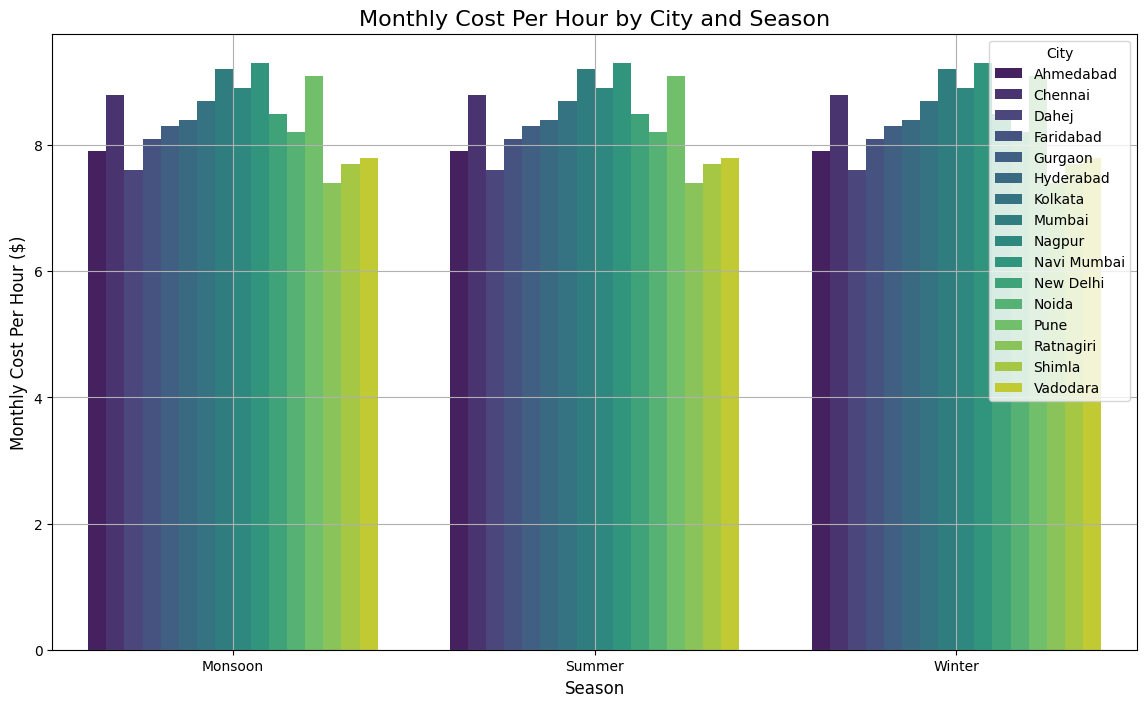

In [26]:
# --------- Step 2: Cost Efficiency by Season and City ---------

# Group by city and season to calculate cost efficiency
city_season_analysis = df.groupby(['City', 'season'])[['MonthlyCostPerHour', 'TariffEfficiency']].mean().reset_index()
print("\nCost Efficiency by City and Season:")
print(city_season_analysis)

# Plot cost efficiency by season for top cities
plt.figure(figsize=(14, 8))
sns.barplot(data=city_season_analysis, x='season', y='MonthlyCostPerHour', hue='City', palette='viridis')
plt.title('Monthly Cost Per Hour by City and Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Monthly Cost Per Hour ($)', fontsize=12)
plt.legend(title='City', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


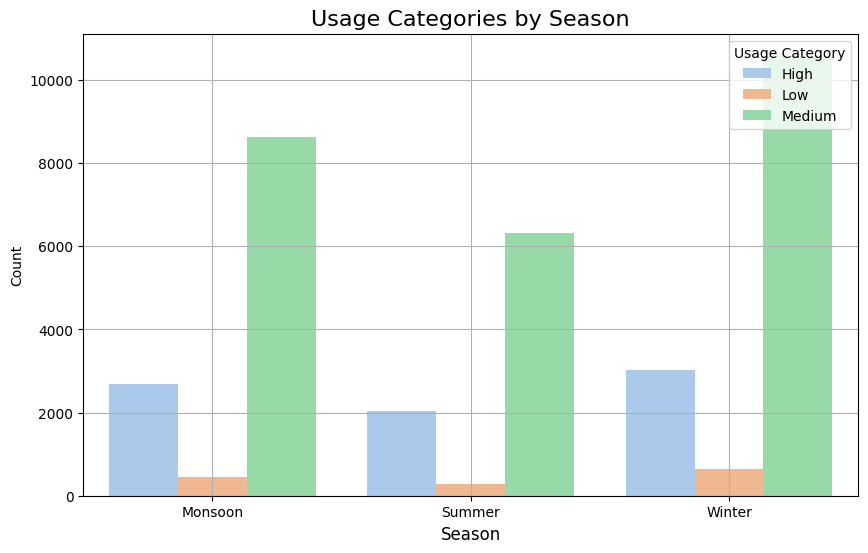

In [27]:
# --------- Step 3: UsageCategory Trends ---------

# Count the number of occurrences of each usage category by season
usage_category_analysis = df.groupby(['season', 'UsageCategory']).size().reset_index(name='Count')

# Plot usage categories by season
plt.figure(figsize=(10, 6))
sns.barplot(data=usage_category_analysis, x='season', y='Count', hue='UsageCategory', palette='pastel')
plt.title('Usage Categories by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count')
plt.legend(title='Usage Category', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


Seasonal Appliance Usage and Total Consumption:
    season  TotalApplianceHours  TotalConsumption
0  Monsoon            51.196580         51.196580
1   Summer            51.354682         51.354682
2   Winter            51.285022         51.285022


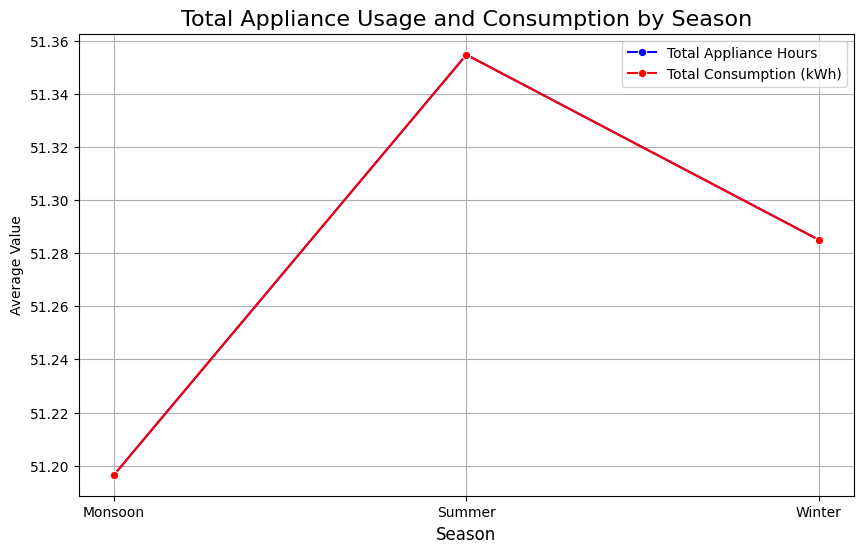

In [28]:
# --------- Step 4: Appliance Usage Patterns ---------

# Calculate average TotalApplianceHours and TotalConsumption by season
season_usage_analysis = df.groupby('season')[['TotalApplianceHours', 'TotalConsumption']].mean().reset_index()
print("\nSeasonal Appliance Usage and Total Consumption:")
print(season_usage_analysis)

# Plot TotalApplianceHours and TotalConsumption by season
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_usage_analysis, x='season', y='TotalApplianceHours', marker='o', label='Total Appliance Hours', color='blue')
sns.lineplot(data=season_usage_analysis, x='season', y='TotalConsumption', marker='o', label='Total Consumption (kWh)', color='red')
plt.title('Total Appliance Usage and Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Value')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


In [29]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill', 'season', 'MonthlyCostPerHour', 'TariffEfficiency',
       'TotalApplianceHours', 'Fan_Contribution', 'Refrigerator_Contribution',
       'AirConditioner_Contribution', 'Television_Contribution',
       'Monitor_Contribution', 'MotorPump_Contribution', 'UsageCategory',
       'TotalConsumption'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34654 entries, 0 to 45342
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fan                          34654 non-null  int64  
 1   Refrigerator                 34654 non-null  float64
 2   AirConditioner               34654 non-null  float64
 3   Television                   34654 non-null  float64
 4   Monitor                      34654 non-null  float64
 5   MotorPump                    34654 non-null  int64  
 6   Month                        34654 non-null  int64  
 7   City                         34654 non-null  object 
 8   Company                      34654 non-null  object 
 9   MonthlyHours                 34654 non-null  int64  
 10  TariffRate                   34654 non-null  float64
 11  ElectricityBill              34654 non-null  float64
 12  season                       34654 non-null  object 
 13  MonthlyCostPerHour   

In [31]:
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   
5   13          22.0             0.0        18.0      1.0          0      6   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   
5  Ratnagiri                           Adani Power Ltd.           471   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  \
0         8.4           3225.6   Winter                 8.4             384.0   
1         7.8           3806.4   Summer                 7.8             488.0   
3         9.2           4370.0  Monsoon                 9.2             475.0   
4         9.2           4204.4   Winter                 9.2             457.0   
5         7.4           3485.4  Monsoon                 7.4             471.0   

   TotalApplianceHours  Fan_Contribution  Refrigerator_Contribution  \
0                 48.0         33.333333                  47.916667   
1                 47.0         40.425532                  46.808511   
3                 54.0         12.962963                  40.740741   
4                 48.0         22.916667                  47.916667   
5                 54.0         24.074074                  40.740741   

   AirConditioner_Contribution  Television_Contribution  Monitor_Contribution  \
0                     4.166667                12.500000              2.083333   
1                     4.255319                 6.382979              2.127660   
3                     5.555556                38.888889              1.851852   
4                     4.166667                22.916667              2.083333   
5                     0.000000                33.333333              1.851852   

   MotorPump_Contribution UsageCategory  TotalConsumption  
0                     0.0        Medium              48.0  
1                     0.0        Medium              47.0  
3                     0.0        Medium              54.0  
4                     0.0        Medium              48.0  
5                     0.0        Medium              54.0

# Modeling 

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Preprocessing 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# time 
import time

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34654 entries, 0 to 45342
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fan                          34654 non-null  int64  
 1   Refrigerator                 34654 non-null  float64
 2   AirConditioner               34654 non-null  float64
 3   Television                   34654 non-null  float64
 4   Monitor                      34654 non-null  float64
 5   MotorPump                    34654 non-null  int64  
 6   Month                        34654 non-null  int64  
 7   City                         34654 non-null  object 
 8   Company                      34654 non-null  object 
 9   MonthlyHours                 34654 non-null  int64  
 10  TariffRate                   34654 non-null  float64
 11  ElectricityBill              34654 non-null  float64
 12  season                       34654 non-null  object 
 13  MonthlyCostPerHour   

In [34]:
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   
5   13          22.0             0.0        18.0      1.0          0      6   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   
5  Ratnagiri                           Adani Power Ltd.           471   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  \
0         8.4           3225.6   Winter                 8.4             384.0   
1         7.8           3806.4   Summer                 7.8             488.0   
3         9.2           4370.0  Monsoon                 9.2             475.0   
4         9.2           4204.4   Winter                 9.2             457.0   
5         7.4           3485.4  Monsoon                 7.4             471.0   

   TotalApplianceHours  Fan_Contribution  Refrigerator_Contribution  \
0                 48.0         33.333333                  47.916667   
1                 47.0         40.425532                  46.808511   
3                 54.0         12.962963                  40.740741   
4                 48.0         22.916667                  47.916667   
5                 54.0         24.074074                  40.740741   

   AirConditioner_Contribution  Television_Contribution  Monitor_Contribution  \
0                     4.166667                12.500000              2.083333   
1                     4.255319                 6.382979              2.127660   
3                     5.555556                38.888889              1.851852   
4                     4.166667                22.916667              2.083333   
5                     0.000000                33.333333              1.851852   

   MotorPump_Contribution UsageCategory  TotalConsumption  
0                     0.0        Medium              48.0  
1                     0.0        Medium              47.0  
3                     0.0        Medium              54.0  
4                     0.0        Medium              48.0  
5                     0.0        Medium              54.0

### one hot encoder 

In [39]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['City', 'Company', 'season', 'UsageCategory'], dtype='object')

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['City', 'Company', 'season', 'UsageCategory']

# Create a copy of the DataFrame with the selected columns
encoded_df = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
df= encoded_df.copy()

df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0  16.0          23.0             2.0         6.0      1.0        0.0   10.0   
1  19.0          22.0             2.0         3.0      1.0        0.0    5.0   
3   7.0          22.0             3.0        21.0      1.0        0.0    6.0   
4  11.0          23.0             2.0        11.0      1.0        0.0    2.0   
5  13.0          22.0             0.0        18.0      1.0        0.0    6.0   

   MonthlyHours  TariffRate  ElectricityBill  MonthlyCostPerHour  \
0         384.0         8.4           3225.6                 8.4   
1         488.0         7.8           3806.4                 7.8   
3         475.0         9.2           4370.0                 9.2   
4         457.0         9.2           4204.4                 9.2   
5         471.0         7.4           3485.4                 7.4   

   TariffEfficiency  TotalApplianceHours  Fan_Contribution  \
0             384.0                 48.0         33.333333   
1             488.0                 47.0         40.425532   
3             475.0                 54.0         12.962963   
4             457.0                 48.0         22.916667   
5             471.0                 54.0         24.074074   

   Refrigerator_Contribution  AirConditioner_Contribution  \
0                  47.916667                     4.166667   
1                  46.808511                     4.255319   
3                  40.740741                     5.555556   
4                  47.916667                     4.166667   
5                  40.740741                     0.000000   

   Television_Contribution  Monitor_Contribution  MotorPump_Contribution  \
0                12.500000              2.083333                     0.0   
1                 6.382979              2.127660                     0.0   
3                38.888889              1.851852                     0.0   
4                22.916667              2.083333                     0.0   
5                33.333333              1.851852                     0.0   

   TotalConsumption  City_Chennai  City_Dahej  City_Faridabad  City_Gurgaon  \
0              48.0           0.0         0.0             0.0           0.0   
1              47.0           0.0         0.0             0.0           0.0   
3              54.0           0.0         0.0             0.0           0.0   
4              48.0           0.0         0.0             0.0           0.0   
5              54.0           0.0         0.0             0.0           0.0   

   City_Hyderabad  City_Kolkata  City_Mumbai  City_Nagpur  City_Navi Mumbai  \
0             1.0           0.0          0.0          0.0               0.0   
1             0.0           0.0          0.0          0.0               0.0   
3             0.0           0.0          1.0          0.0               0.0   
4             0.0           0.0          0.0          0.0               0.0   
5             0.0           0.0          0.0          0.0               0.0   

   City_New Delhi  City_Noida  City_Pune  City_Ratnagiri  City_Shimla  \
0             0.0         0.0        0.0             0.0          0.0   
1             0.0         0.0        0.0             0.0          0.0   
3             0.0         0.0        0.0             0.0          0.0   
4             0.0         0.0        0.0             1.0          0.0   
5             1.0         0.0        0.0             0.0          0.0   

   City_Vadodara  Company_Bonfiglioli Transmission Pvt. Ltd.  Company_CESC  \
0            0.0                                         0.0           0.0   
1            1.0                                         0.0           0.0   
3            0.0                                         0.0           0.0   
4            0.0                                         0.0           0.0   
5            0.0                                         0.0           0.0   

   Company_GE T&D India Limited  Company_Guj Ind Power  \
0

### Define the features and target variable 

In [41]:
# drop null values
df = df.dropna()

# Features 
X = df.drop(columns={'ElectricityBill'})

# Target variable 
y = df['ElectricityBill']


# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=127)

### Standardize 


In [44]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)



In [45]:
# Define the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'LGBM Regressor': LGBMRegressor(verbose=0),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(8)

Model         MAE            MSE        RMSE       MAPE  \
0       Decision Tree    4.174721     197.944538   14.069276   0.120974   
1         Extra Trees    1.521633      44.220407    6.649843   0.043658   
2       Random Forest    2.770886      83.891938    9.159254   0.077593   
3   Gradient Boosting   16.902509     474.220280   21.776599   0.427652   
4      KNN Regression  486.206866  358626.111453  598.853998  12.727349   
5      LGBM Regressor   10.983879     313.896263   17.717118   0.305918   
6  CatBoost Regressor    7.600677     294.313503   17.155568   0.221418   
7       XGB Regressor    9.028768     149.666929   12.233844   0.231601   

         R2  Training Time (s)  Prediction Time (s)  
0  0.999801           0.472374             0.002519  
1  0.999955          21.909357             0.157390  
2  0.999916          29.112546             0.173051  
3  0.999523           6.143511             0.012362  
4  0.639061           0.007381             0.303317  
5  0.999684           0.291962             0.013517  
6  0.999704           2.952914             0.006699  
7  0.999849           2.584774             0.009289

In [47]:
# Plotting a grouped bar graph
import plotly.express as px
fig = px.bar(results_df, x='Model',
             y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2', 'Training Time (s)', 'Prediction Time (s)'],
             labels={'value': 'Metric Value'}, 
             title='Best Model',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=700,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
             
fig.show()

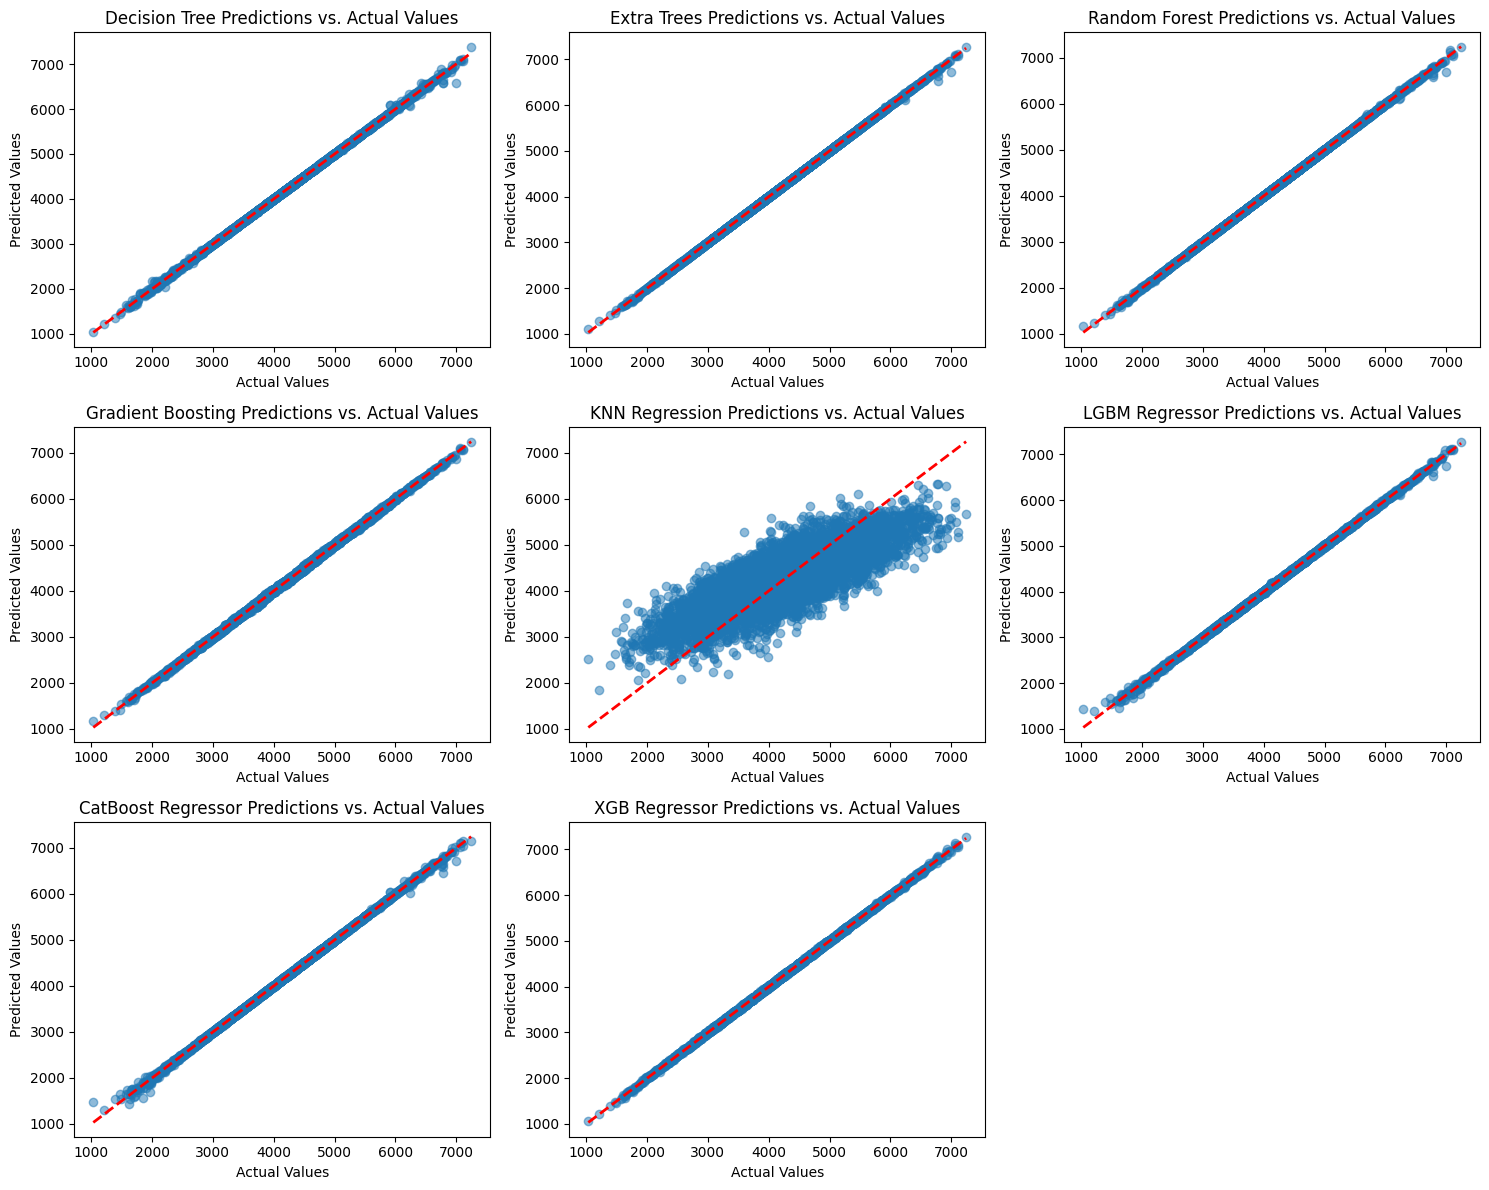

In [48]:
# Scater plot

# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

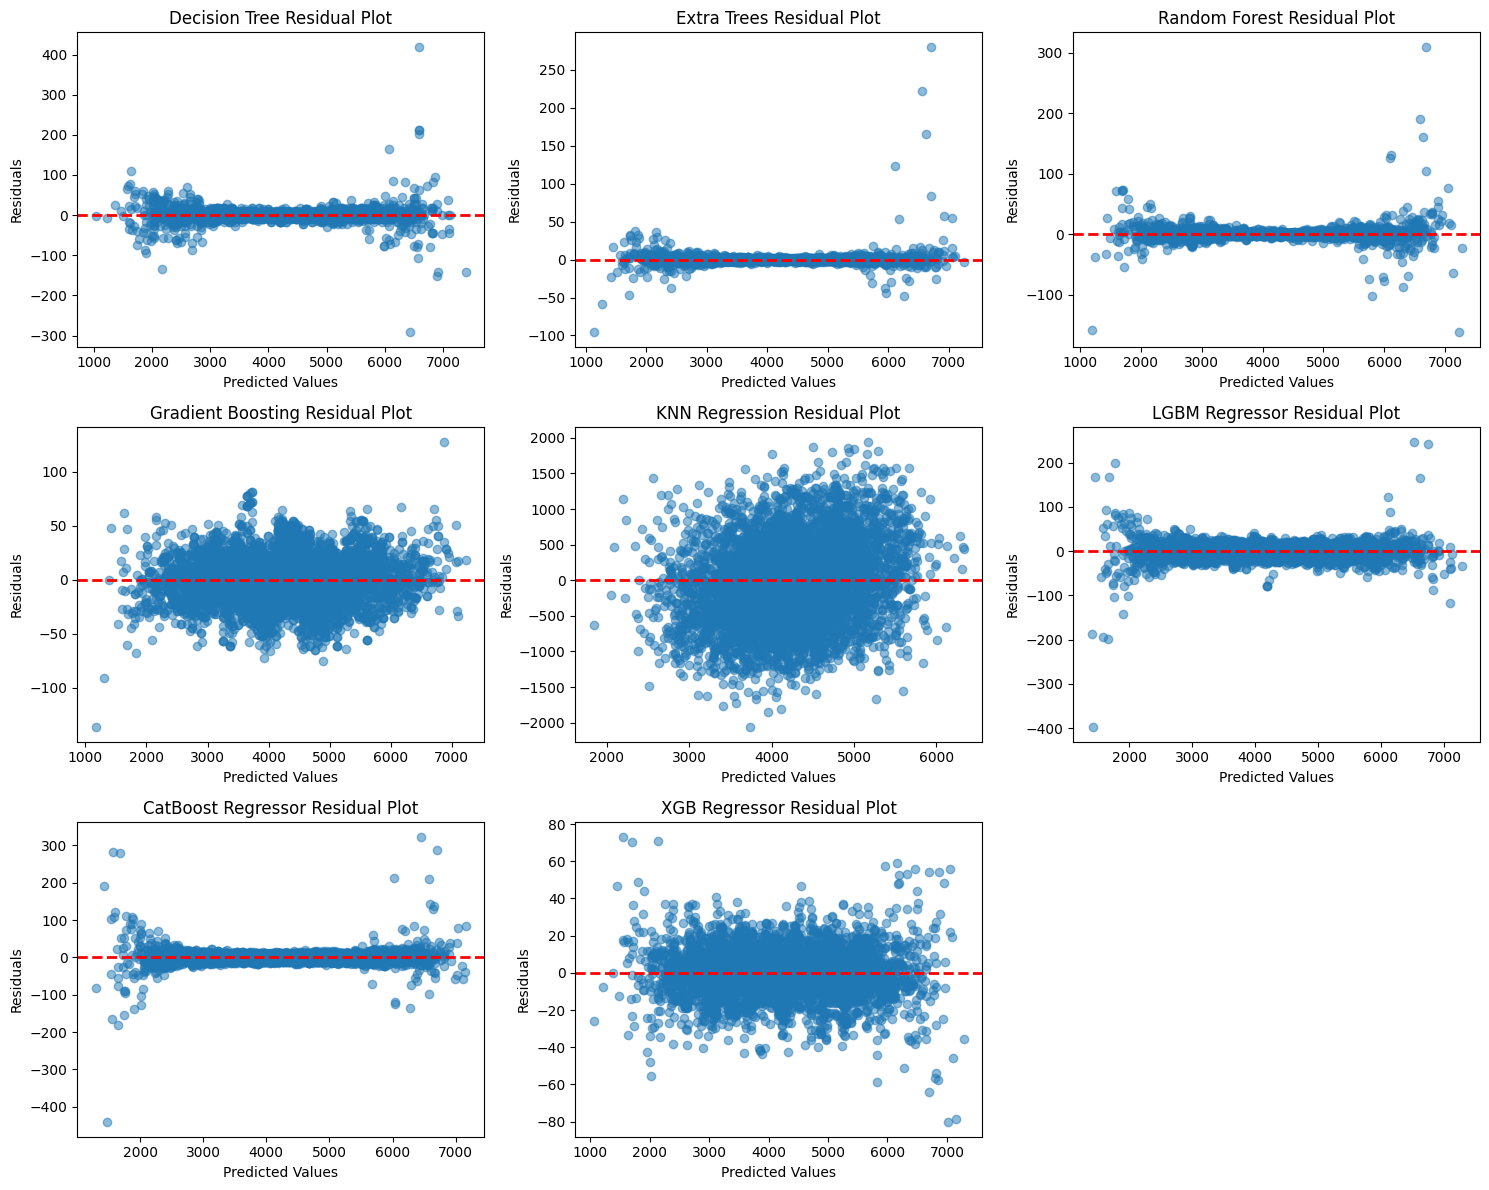

In [49]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

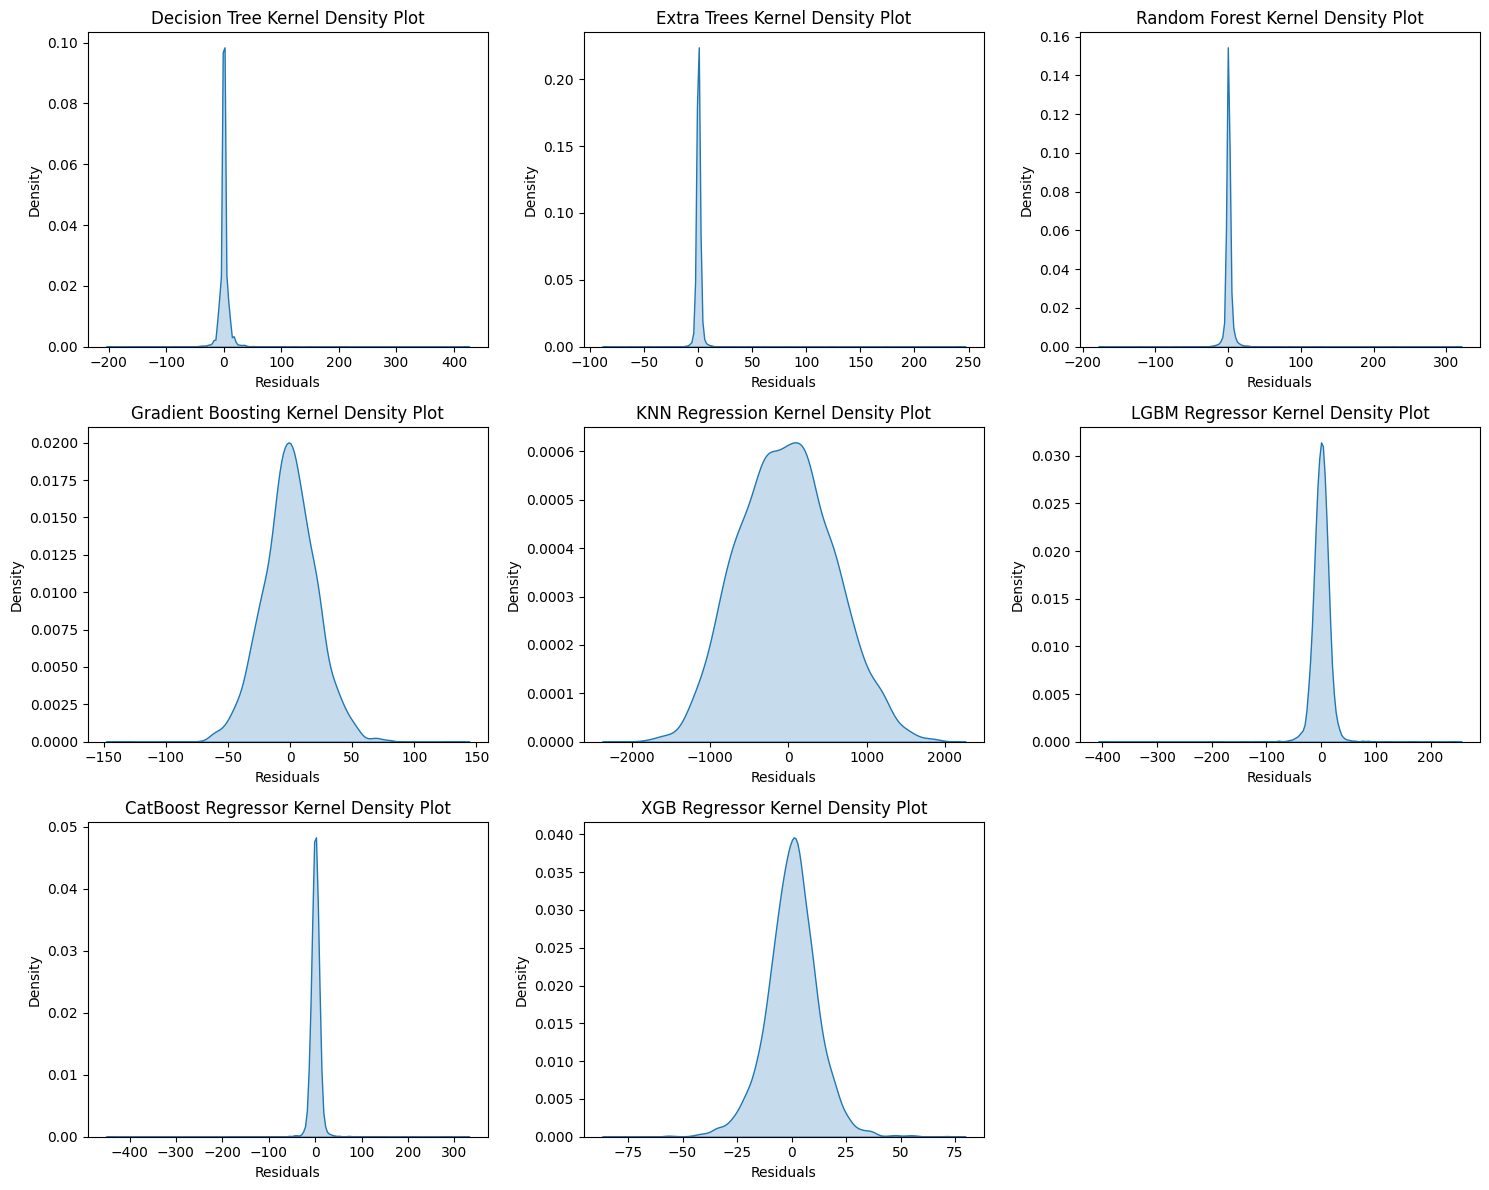

In [50]:
# Kernel Density Plot
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Kernel density plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True)
    plt.title(f'{model_name} Kernel Density Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

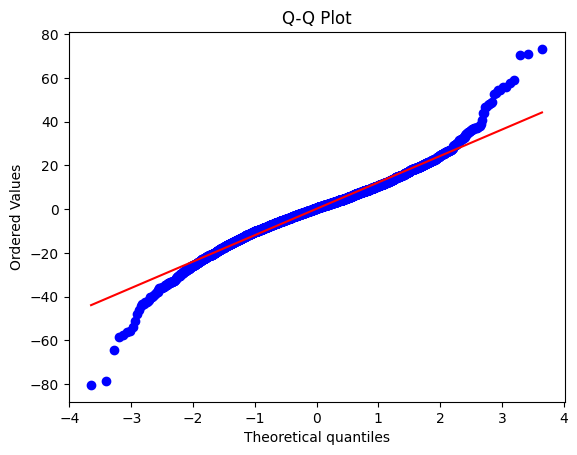

In [52]:
import scipy.stats as stats


stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [53]:
# Initialize the Random Forest Regressor
rf_model = XGBRegressor()

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Adjusted R2': [], 'COD': [], 'Training Time (s)': [], 'Prediction Time (s)': []
}

# Measure the training time
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Measure the prediction time
start_time = time.time()
y_pred = rf_model.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Calculate Coefficient of Determination (COD) (it's equivalent to R2 in sklearn)
cod = r2  # COD is the same as R2 in sklearn metrics.

# Calculate Adjusted R2
n = X_test_scaled.shape[0]  # Number of samples
p = X_test_scaled.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Store results in a dictionary
results['Model'].append('Random Forest')
results['MAE'].append(mae)
results['MSE'].append(mse)
results['RMSE'].append(rmse)
results['R2'].append(r2)
results['Adjusted R2'].append(adjusted_r2)
results['COD'].append(cod)
results['MAPE'].append(mape)
results['Training Time (s)'].append(training_time)
results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df


Model       MAE         MSE       RMSE      MAPE        R2  \
0  Random Forest  9.028768  149.666929  12.233844  0.231601  0.999849   

   Adjusted R2       COD  Training Time (s)  Prediction Time (s)  
0     0.999847  0.999849           2.263174             0.009302

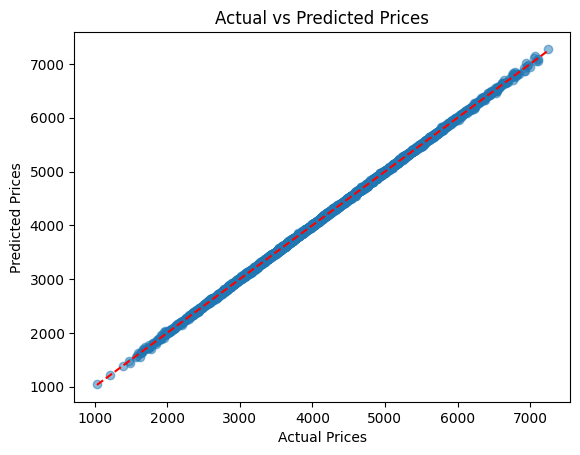

In [54]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

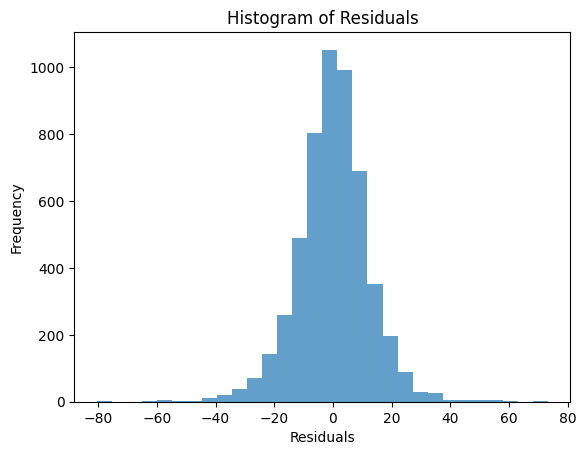

In [55]:
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


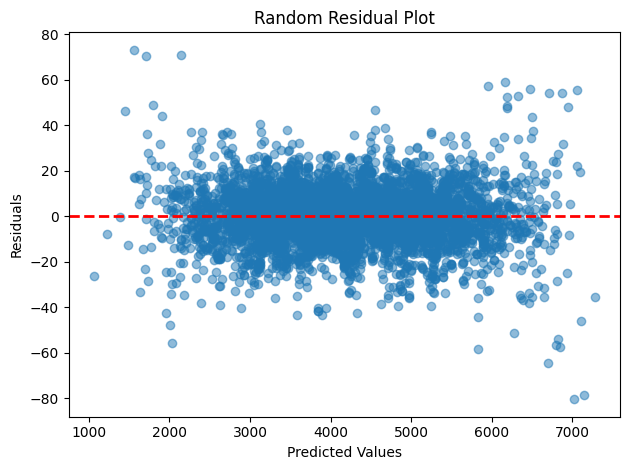

In [56]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Random Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

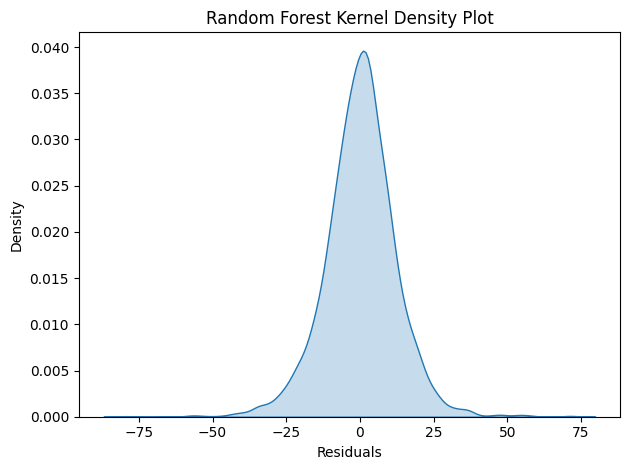

In [57]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

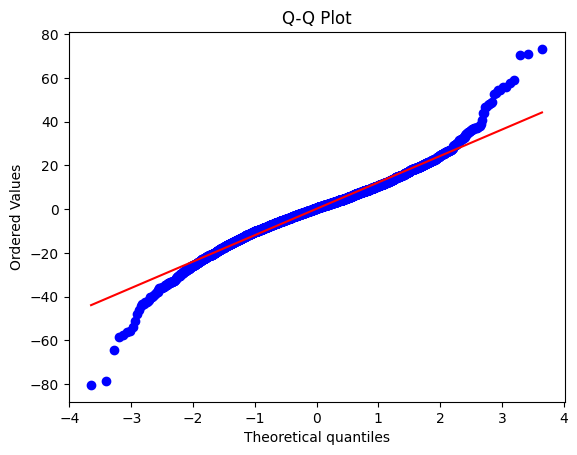

In [58]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


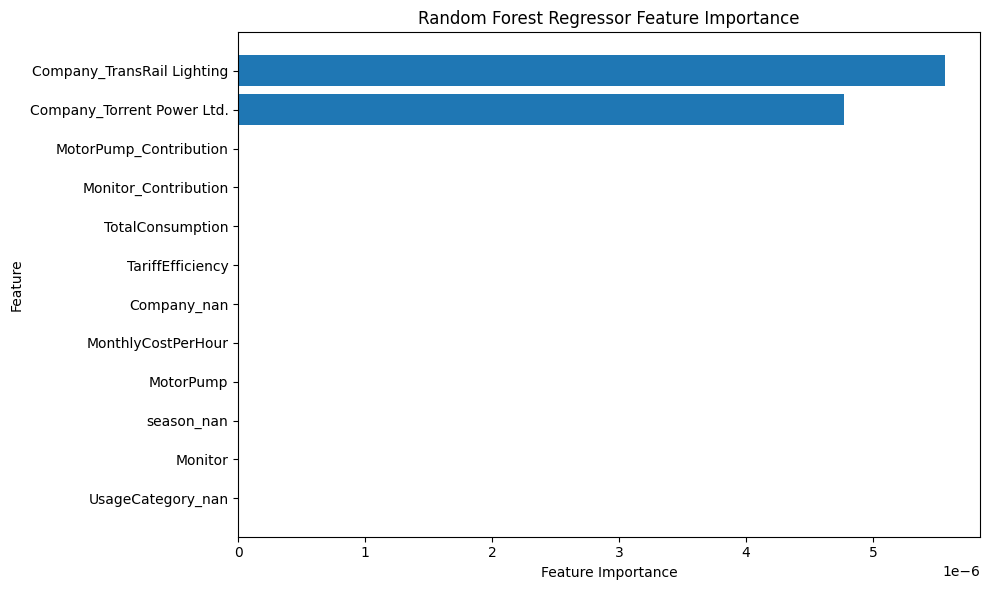

In [62]:
# Get Feature Importance
feature_importance =  model.feature_importances_

# Create a DataFrame to view feature importance 
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[60:100]

# Plot Horizontal Bar Graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have most important at the top
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26464 entries, 0 to 34653
Data columns (total 73 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Fan                                                                         26464 non-null  float64
 1   Refrigerator                                                                26464 non-null  float64
 2   AirConditioner                                                              26464 non-null  float64
 3   Television                                                                  26464 non-null  float64
 4   Monitor                                                                     26464 non-null  float64
 5   MotorPump                                                                   26464 non-null  float64
 6   Month                                              